<a href="https://colab.research.google.com/github/Onkar290/java/blob/main/EDI_TY_SEM1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib. pyplot as plt

In [ ]:
from google.colab import files


uploaded = files.upload()


Saving parkinsons_updrs_data.csv to parkinsons_updrs_data (1).csv


In [ ]:
data = pd.read_csv("parkinsons_updrs_data.csv")
data.info()
num_rows, num_columns = data.shape

# Print the number of rows and columns
print("Number of Rows:", num_rows)
print("Number of Columns:", num_columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subject#       5875 non-null   int64  
 1   age            5875 non-null   int64  
 2   sex            5875 non-null   int64  
 3   test_time      5875 non-null   float64
 4   motor_UPDRS    5875 non-null   float64
 5   total_UPDRS    5875 non-null   float64
 6   Jitter(%)      5875 non-null   float64
 7   Jitter(Abs)    5875 non-null   float64
 8   Jitter:RAP     5875 non-null   float64
 9   Jitter:PPQ5    5875 non-null   float64
 10  Jitter:DDP     5875 non-null   float64
 11  Shimmer        5875 non-null   float64
 12  Shimmer(dB)    5875 non-null   float64
 13  Shimmer:APQ3   5875 non-null   float64
 14  Shimmer:APQ5   5875 non-null   float64
 15  Shimmer:APQ11  5875 non-null   float64
 16  Shimmer:DDA    5875 non-null   float64
 17  NHR            5875 non-null   float64
 18  HNR     

In [ ]:
data.describe()


,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,...,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000
mean,21.494128,64.804936,0.317787,92.863722,21.296229,29.018942,0.006154,0.000044,0.002987,0.003277,...,0.310960,0.017156,0.020144,0.027481,0.051467,0.032120,21.679495,0.541473,0.653240,0.219589
std,12.372279,8.821524,0.465656,53.445602,8.129282,10.700283,0.005624,0.000036,0.003124,0.003732,...,0.230254,0.013237,0.016664,0.019986,0.039711,0.059692,4.291096,0.100986,0.070902,0.091498
min,1.000000,36.000000,0.000000,-4.262500,5.037700,7.000000,0.000830,0.000002,0.000330,0.000430,...,0.026000,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983
25%,10.000000,58.000000,0.000000,46.847500,15.000000,21.371000,0.003580,0.000022,0.001580,0.001820,...,0.175000,0.009280,0.010790,0.015665,0.027830,0.010955,19.406000,0.469785,0.596180,0.156340
50%,22.000000,65.000000,0.000000,91.523000,20.871000,27.576000,0.004900,0.000034,0.002250,0.002490,...,0.253000,0.013700,0.015940,0.022710,0.041110,0.018448,21.920000,0.542250,0.643600,0.205500
75%,33.000000,72.000000,1.000000,138.445000,27.596500,36.399000,0.006800,0.000053,0.003290,0.003460,...,0.365000,0.020575,0.023755,0.032715,0.061735,0.031463,24.444000,0.614045,0.711335,0.264490
max,42.000000,85.000000,1.000000,215.490000,39.511000,54.992000,0.099990,0.000446,0.057540,0.069560,...,2.107000,0.162670,0.167020,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730


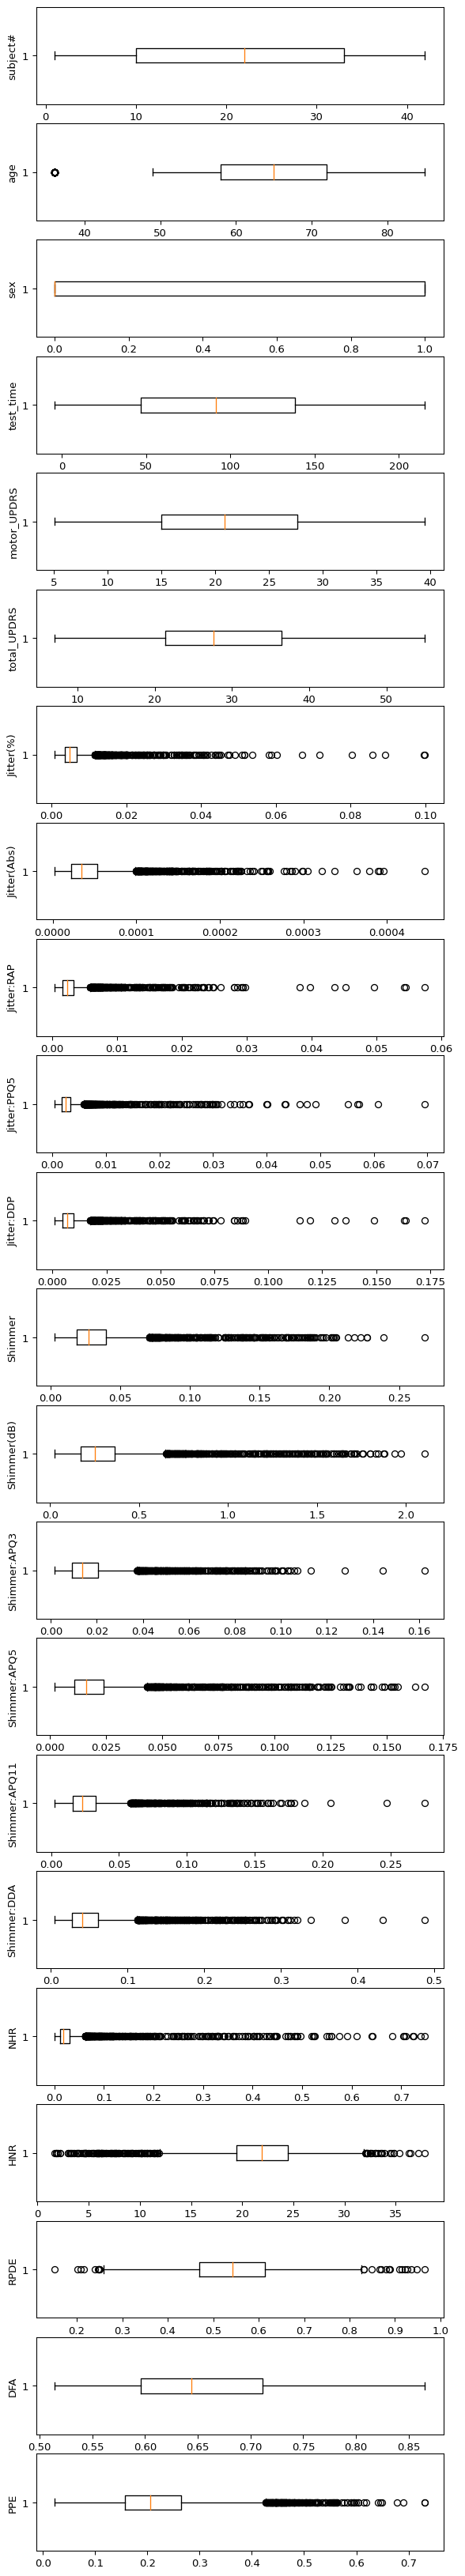

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(len(data.columns), 1, dpi=95, figsize=(7, 2*len(data.columns)))
i = 0
for col in data.columns:
    axs[i].boxplot(data[col], vert=False)
    axs[i].set_ylabel(col)
    i += 1
plt.show()


In [ ]:
import pandas as pd

outlier_threshold = 1.5
outlier_counts = {}

for col in data.columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    outlier_mask = (data[col] < (Q1 - outlier_threshold * IQR)) | (data[col] > (Q3 + outlier_threshold * IQR))

    outlier_count = outlier_mask.sum()

    outlier_counts[col] = outlier_count

for col, count in outlier_counts.items():
    print(f"Column '{col}': {count} outliers")


Column 'subject#': 0 outliers
Column 'age': 101 outliers
Column 'sex': 0 outliers
Column 'test_time': 0 outliers
Column 'motor_UPDRS': 0 outliers
Column 'total_UPDRS': 0 outliers
Column 'Jitter(%)': 398 outliers
Column 'Jitter(Abs)': 366 outliers
Column 'Jitter:RAP': 414 outliers
Column 'Jitter:PPQ5': 425 outliers
Column 'Jitter:DDP': 413 outliers
Column 'Shimmer': 333 outliers
Column 'Shimmer(dB)': 332 outliers
Column 'Shimmer:APQ3': 332 outliers
Column 'Shimmer:APQ5': 314 outliers
Column 'Shimmer:APQ11': 314 outliers
Column 'Shimmer:DDA': 331 outliers
Column 'NHR': 436 outliers
Column 'HNR': 171 outliers
Column 'RPDE': 26 outliers
Column 'DFA': 0 outliers
Column 'PPE': 206 outliers


In [ ]:
def remove_outliers(data, column_name):
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[column_name] >= lower_bound) & (data[column_name] <= upper_bound)]
    return data

columns_to_remove_outliers = ['age', 'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP',
                              'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'Shimmer:APQ11',
                              'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'PPE']

for column in columns_to_remove_outliers:
    data = remove_outliers(data, column)

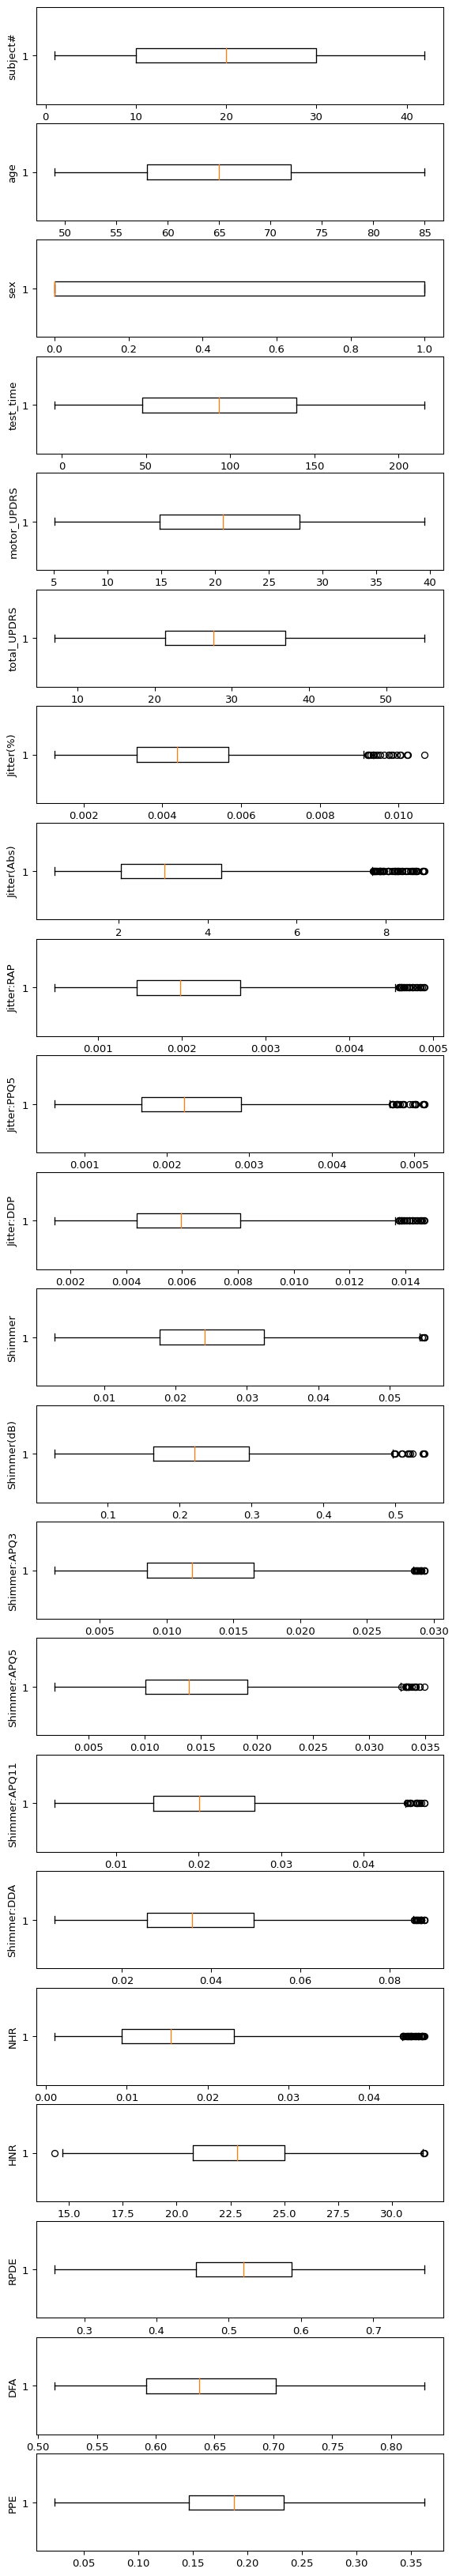

In [ ]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(len(data.columns), 1, dpi=95, figsize=(7, 2*len(data.columns)))
i = 0
for col in data.columns:
    axs[i].boxplot(data[col], vert=False)
    axs[i].set_ylabel(col)
    i += 1
plt.show()

In [ ]:
a = np.array(data)
X = a[:, 1:-2]
Y = a[:,-1]
print (X,Y)

[[7.2000e+01 0.0000e+00 5.6431e+00 ... 1.4290e-02 2.1640e+01 4.1888e-01]
 [7.2000e+01 0.0000e+00 1.2666e+01 ... 1.1112e-02 2.7183e+01 4.3493e-01]
 [7.2000e+01 0.0000e+00 1.9681e+01 ... 2.0220e-02 2.3047e+01 4.6222e-01]
 ...
 [6.1000e+01 0.0000e+00 1.5682e+02 ... 1.7701e-02 2.5065e+01 4.7792e-01]
 [6.1000e+01 0.0000e+00 1.6373e+02 ... 7.9840e-03 2.4422e+01 5.6865e-01]
 [6.1000e+01 0.0000e+00 1.7073e+02 ... 8.1720e-03 2.3259e+01 5.8608e-01]] [0.16006 0.1081  0.21014 ... 0.14157 0.14204 0.15336]


In [ ]:
trainx, testx, trainy, testy = train_test_split(X, Y, test_size=0.1, random_state=0)
model = sm.OLS(trainy, trainx).fit()

rsquared = model.rsquared
predictions = model.predict(testx)
rsquared_test = r2_score(testy, predictions)
print("Linear Regression - R-squared:", rsquared)

random_forest_model = RandomForestRegressor(n_estimators=5, random_state=0)
random_forest_model.fit(trainx, trainy)
rf_predictions = random_forest_model.predict(testx)

rf_r2 = r2_score(testy, rf_predictions)
print("Random Forest - R-squared:", rf_r2)

Linear Regression - R-squared: 0.97068926337244
Random Forest - R-squared: 0.6419599505093495


Feature: age, Importance: 0.013234491202569875
Feature: sex, Importance: 0.0028349014108105665
Feature: test_time, Importance: 0.01024854684216087
Feature: motor_UPDRS, Importance: 0.013177385568889902
Feature: total_UPDRS, Importance: 0.014232261642436874
Feature: Jitter(%), Importance: 0.1613845389221317
Feature: Jitter(Abs), Importance: 0.039287398714130284
Feature: Jitter:RAP, Importance: 0.012798508183730758
Feature: Jitter:PPQ5, Importance: 0.6125084171557634
Feature: Jitter:DDP, Importance: 0.013881409495459551
Feature: Shimmer, Importance: 0.004017584502392695
Feature: Shimmer(dB), Importance: 0.005734564801348744
Feature: Shimmer:APQ3, Importance: 0.004780948916604991
Feature: Shimmer:APQ5, Importance: 0.00509330456536288
Feature: Shimmer:APQ11, Importance: 0.014043060876964974
Feature: Shimmer:DDA, Importance: 0.00500991059470607
Feature: NHR, Importance: 0.01925344308212084
Feature: HNR, Importance: 0.02758219840913458
Feature: RPDE, Importance: 0.02089712511328043


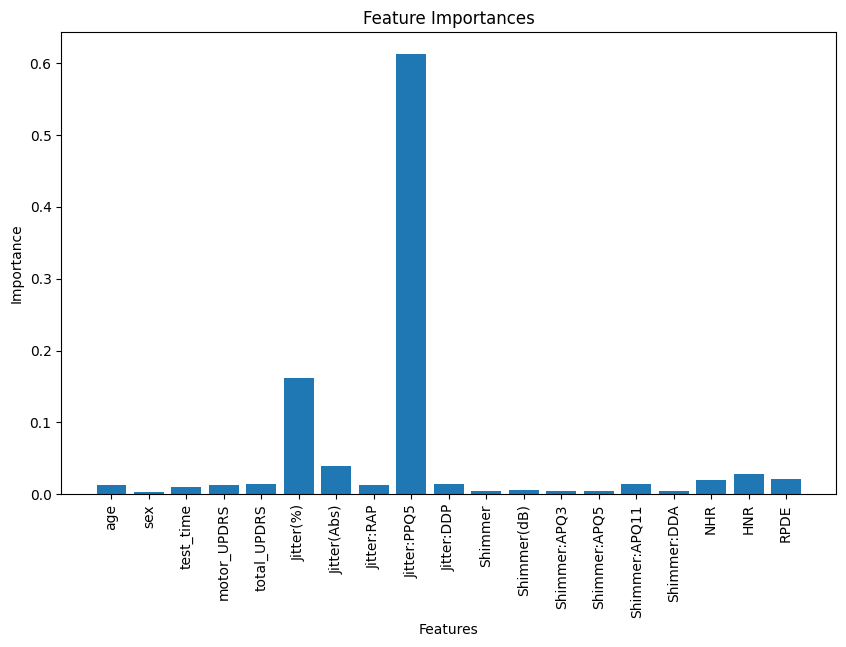

In [ ]:
dataa = pd.read_csv("parkinsons_updrs_data.csv")
B = dataa.iloc[:, -1]

A = dataa.iloc[:, 1:-2]

trainx, testx, trainy, testy = train_test_split(A, B, test_size=0.1, random_state=0)

random_forest_model = RandomForestRegressor(n_estimators=5, random_state=0)
random_forest_model.fit(trainx, trainy)

feature_importances = random_forest_model.feature_importances_

selected_features = A.columns
for feature, importance in zip(selected_features, feature_importances):
    print(f"Feature: {feature}, Importance: {importance}")

plt.figure(figsize=(10, 6))
plt.bar(selected_features, feature_importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=90)
plt.show()

In [ ]:
num_features_to_select = 5
top_feature_indices = np.argsort(feature_importances)[-num_features_to_select:]
selected_features = A.columns[top_feature_indices]

print("Selected Features:", selected_features)

trainx_selected = trainx[selected_features]
testx_selected = testx[selected_features]

random_forest_model2 = RandomForestRegressor(n_estimators=5, random_state=0)
random_forest_model2.fit(trainx_selected, trainy)
rf_predictions = random_forest_model2.predict(testx_selected)

rf_r2 = r2_score(testy, rf_predictions)
print("Random Forest - R-squared:", rf_r2)



Selected Features: Index(['RPDE', 'HNR', 'Jitter(Abs)', 'Jitter(%)', 'Jitter:PPQ5'], dtype='object')
Random Forest - R-squared: 0.7507721171174984


In [ ]:
num_features_to_select = 3
top_feature_indices = np.argsort(feature_importances)[-num_features_to_select:]
selected_features = A.columns[top_feature_indices]

print("Selected Features:", selected_features)

trainx_selected = trainx[selected_features]
testx_selected = testx[selected_features]

random_forest_model2 = RandomForestRegressor(n_estimators=5, random_state=0)
random_forest_model2.fit(trainx_selected, trainy)
rf_predictions = random_forest_model2.predict(testx_selected)

rf_r2 = r2_score(testy, rf_predictions)
print("Random Forest - R-squared:", rf_r2)



Selected Features: Index(['Jitter(Abs)', 'Jitter(%)', 'Jitter:PPQ5'], dtype='object')
Random Forest - R-squared: 0.7348341949957746


In [ ]:
num_features_to_select = 7
top_feature_indices = np.argsort(feature_importances)[-num_features_to_select:]
selected_features = A.columns[top_feature_indices]

print("Selected Features:", selected_features)

trainx_selected = trainx[selected_features]
testx_selected = testx[selected_features]

random_forest_model2 = RandomForestRegressor(n_estimators=5, random_state=0)
random_forest_model2.fit(trainx_selected, trainy)
rf_predictions = random_forest_model2.predict(testx_selected)

rf_r2 = r2_score(testy, rf_predictions)
print("Random Forest - R-squared:", rf_r2)



Selected Features: Index(['total_UPDRS', 'NHR', 'RPDE', 'HNR', 'Jitter(Abs)', 'Jitter(%)',
       'Jitter:PPQ5'],
      dtype='object')
Random Forest - R-squared: 0.7964075029561595


In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_forest = RandomForestRegressor(random_state=0)
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(trainx_selected, trainy)
best_params = grid_search.best_params_
best_random_forest = RandomForestRegressor(**best_params, random_state=0)
best_random_forest.fit(trainx_selected, trainy)
rf_predictions = best_random_forest.predict(testx_selected)
rf_r2 = r2_score(testy, rf_predictions)
print("Random Forest - R-squared:", rf_r2)


Random Forest - R-squared: 0.8281530083253598


Mean Squared Error: 1.551502114403009
R-squared: 0.9860807070161923


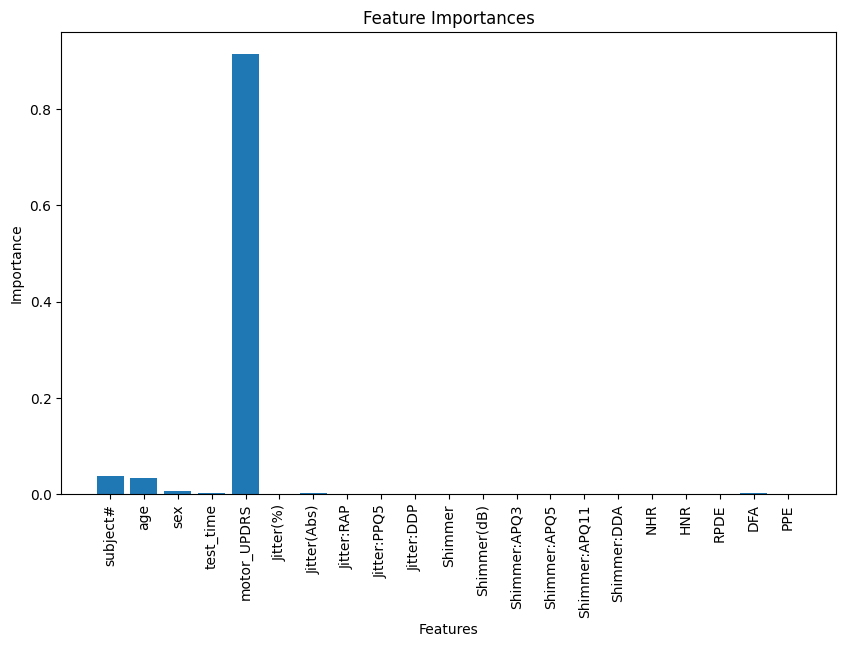

In [ ]:

from sklearn.ensemble import GradientBoostingRegressor


X = data.drop('total_UPDRS', axis=1)
y = data['total_UPDRS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)
gb_regressor.fit(X_train, y_train)
y_pred = gb_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

feature_importances = gb_regressor.feature_importances_
plt.figure(figsize=(10, 6))
plt.bar(X.columns, feature_importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=90)
plt.show()



In [ ]:
num_features_to_select = 3

# Assuming 'data' is your DataFrame containing the features and target variable
top_feature_indices = np.argsort(feature_importances)[-num_features_to_select:]
selected_features = X.columns[top_feature_indices]

print("Selected Features:", selected_features)

# Splitting the data into training and testing sets
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Initializing and fitting the Gradient Boosting Regressor with the selected features
gb_regressor2 = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)
gb_regressor2.fit(X_train_selected, y_train)

# Make predictions
y_pred_gb = gb_regressor2.predict(X_test_selected)

# Evaluate the model
r2_gb = r2_score(y_test, y_pred_gb)
print("Gradient Boosting - R-squared:", r2_gb)


Selected Features: Index(['age', 'subject#', 'motor_UPDRS'], dtype='object')
Gradient Boosting - R-squared: 0.9868642680523184


In [ ]:
num_features_to_select = 5

# Assuming 'data' is your DataFrame containing the features and target variable
top_feature_indices = np.argsort(feature_importances)[-num_features_to_select:]
selected_features = X.columns[top_feature_indices]

print("Selected Features:", selected_features)

# Splitting the data into training and testing sets
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Initializing and fitting the Gradient Boosting Regressor with the selected features
gb_regressor2 = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)
gb_regressor2.fit(X_train_selected, y_train)

# Make predictions
y_pred_gb = gb_regressor2.predict(X_test_selected)

# Evaluate the model
r2_gb = r2_score(y_test, y_pred_gb)
print("Gradient Boosting - R-squared:", r2_gb)

Selected Features: Index(['test_time', 'sex', 'age', 'subject#', 'motor_UPDRS'], dtype='object')
Gradient Boosting - R-squared: 0.9874443314753282


In [ ]:
num_features_to_select = 7

# Assuming 'data' is your DataFrame containing the features and target variable
top_feature_indices = np.argsort(feature_importances)[-num_features_to_select:]
selected_features = X.columns[top_feature_indices]

print("Selected Features:", selected_features)

# Splitting the data into training and testing sets
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Initializing and fitting the Gradient Boosting Regressor with the selected features
gb_regressor2 = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)
gb_regressor2.fit(X_train_selected, y_train)

# Make predictions
y_pred_gb = gb_regressor2.predict(X_test_selected)

# Evaluate the model
r2_gb = r2_score(y_test, y_pred_gb)
print("Gradient Boosting - R-squared:", r2_gb)

Selected Features: Index(['Jitter(Abs)', 'DFA', 'test_time', 'sex', 'age', 'subject#',
       'motor_UPDRS'],
      dtype='object')
Gradient Boosting - R-squared: 0.9870652120661388


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR


X = data.drop('total_UPDRS', axis=1)
y = data['total_UPDRS']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initializing and fitting the Support Vector Regressor
svr_regressor = SVR(kernel='linear')  # You can try 'rbf' or 'poly' as well
svr_regressor.fit(X_train_scaled, y_train)

# Make predictions
y_pred_svr = svr_regressor.predict(X_test_scaled)

# Evaluate the model
r2_svr = r2_score(y_test, y_pred_svr)
print("Support Vector Regression - R-squared:", r2_svr)


Support Vector Regression - R-squared: 0.8989181118420387


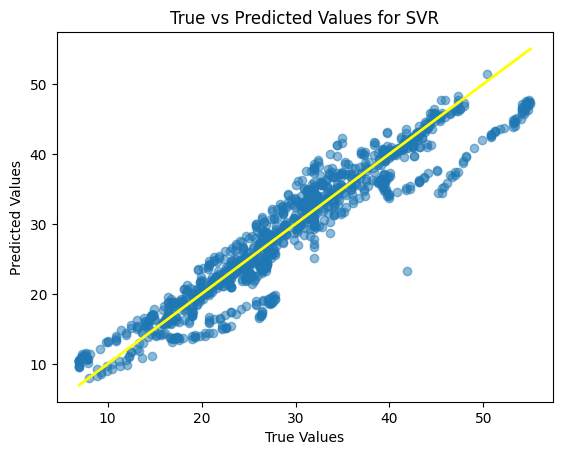

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'y_test' contains the true values and 'y_pred_svr' contains the predicted values
plt.scatter(y_test, y_pred_svr, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='-', color='yellow', linewidth=2)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values for SVR")
plt.show()

In [ ]:
num_features_to_select = 3

# Assuming 'data' is your DataFrame containing the features and target variable
top_feature_indices = (-feature_importances).argsort()[:num_features_to_select]
selected_features = X.columns[top_feature_indices]

print("Selected Features:", selected_features)

# Splitting the data into training and testing sets
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

# Initializing and fitting the Support Vector Regressor
svr_regressor2 = SVR(kernel='linear')  # You can try 'rbf' or 'poly' as well
svr_regressor2.fit(X_train_scaled, y_train)

# Make predictions
y_pred_svr = svr_regressor2.predict(X_test_scaled)

# Evaluate the model
r2_svr = r2_score(y_test, y_pred_svr)
print("Support Vector Regression (Top 5 Features) - R-squared:", r2_svr)

Selected Features: Index(['motor_UPDRS', 'subject#', 'age'], dtype='object')
Support Vector Regression (Top 5 Features) - R-squared: 0.8951009489997239


In [ ]:
num_rows, num_columns = data.shape
print("Number of Rows:", num_rows)
print("Number of Columns:", num_columns)


Number of Rows: 5875
Number of Columns: 22


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score  # Import r2_score

np.random.seed(0)
X = np.random.rand(100, 1)
y = 2 * X + 1 + 0.1 * np.random.randn(100, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a neural network model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(1,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")



Epoch 1/100
3/3 [==============================] - 1s 9ms/step - loss: 4.3495
Epoch 2/100
3/3 [==============================] - 0s 6ms/step - loss: 3.9921
Epoch 3/100
3/3 [==============================] - 0s 5ms/step - loss: 3.6699
Epoch 4/100
3/3 [==============================] - 0s 4ms/step - loss: 3.3722
Epoch 5/100
3/3 [==============================] - 0s 5ms/step - loss: 3.0977
Epoch 6/100
3/3 [==============================] - 0s 4ms/step - loss: 2.8385
Epoch 7/100
3/3 [==============================] - 0s 4ms/step - loss: 2.5924
Epoch 8/100
3/3 [==============================] - 0s 4ms/step - loss: 2.3527
Epoch 9/100
3/3 [==============================] - 0s 4ms/step - loss: 2.1085
Epoch 10/100
3/3 [==============================] - 0s 5ms/step - loss: 1.8477
Epoch 11/100
3/3 [==============================] - 0s 7ms/step - loss: 1.6127
Epoch 12/100
3/3 [==============================] - 0s 7ms/step - loss: 1.3722
Epoch 13/100
3/3 [==============================] - 0s 4ms/st

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                704       
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2817 (11.00 KB)
Trainable params: 2817 (11.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


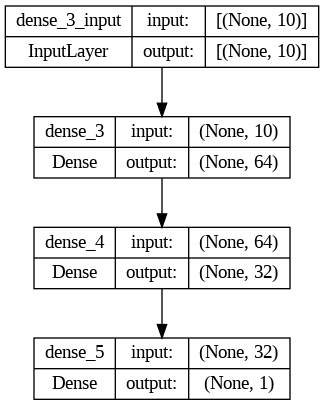

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

# Create a simple neural network model
model = Sequential()
model.add(Dense(64, input_dim=10, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Display model summary
model.summary()

# Visualize the model architecture and save it to a file (e.g., PNG)
plot_model(model, to_file='neural_network.png', show_shapes=True, show_layer_names=True)